In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# importing Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# to Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r'C:\Users\MANAN\OneDrive\Documents\mango1\train'
test_dir = r'C:\Users\MANAN\OneDrive\Documents\mango1\test'
val_dir = r'C:\Users\MANAN\OneDrive\Documents\mango1\validation'


# Defined data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Defined batch size
batch_size = 32

# Defined target image size
target_size = (224, 224)  

# Defined class mode
class_mode = 'categorical'  

# Created data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)


Found 2800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [4]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freezed the base model
base_model.trainable = False


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



83683744/83683744 [==============================] - 289s 3us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)             

In [5]:
history = model.fit(
    train_generator,
    epochs=7,
    validation_data=val_generator
)


Epoch 1/7


88/88 [==============================] - 495s 6s/step - loss: 0.9950 - accuracy: 0.6593 - val_loss: 0.2922 - val_accuracy: 0.9150
Epoch 2/7
88/88 [==============================] - 502s 6s/step - loss: 0.3820 - accuracy: 0.8750 - val_loss: 0.1896 - val_accuracy: 0.9325
Epoch 3/7
88/88 [==============================] - 518s 6s/step - loss: 0.2704 - accuracy: 0.9114 - val_loss: 0.1137 - val_accuracy: 0.9688
Epoch 4/7
88/88 [==============================] - 534s 6s/step - loss: 0.2231 - accuracy: 0.9221 - val_loss: 0.1277 - val_accuracy: 0.9500
Epoch 5/7
88/88 [==============================] - 519s 6s/step - loss: 0.2056 - accuracy: 0.9336 - val_loss: 0.1093 - val_accuracy: 0.9638
Epoch 6/7
88/88 [==============================] - 635s 7s/step - loss: 0.1648 - accuracy: 0.9496 - val_loss: 0.1080 - val_accuracy: 0.9638
Epoch 7/7
88/88 [==============================] - 650s 7s/step - loss: 0.1705 - accuracy: 0.9450 - val_loss: 0.1232 - val_accuracy: 0.9613


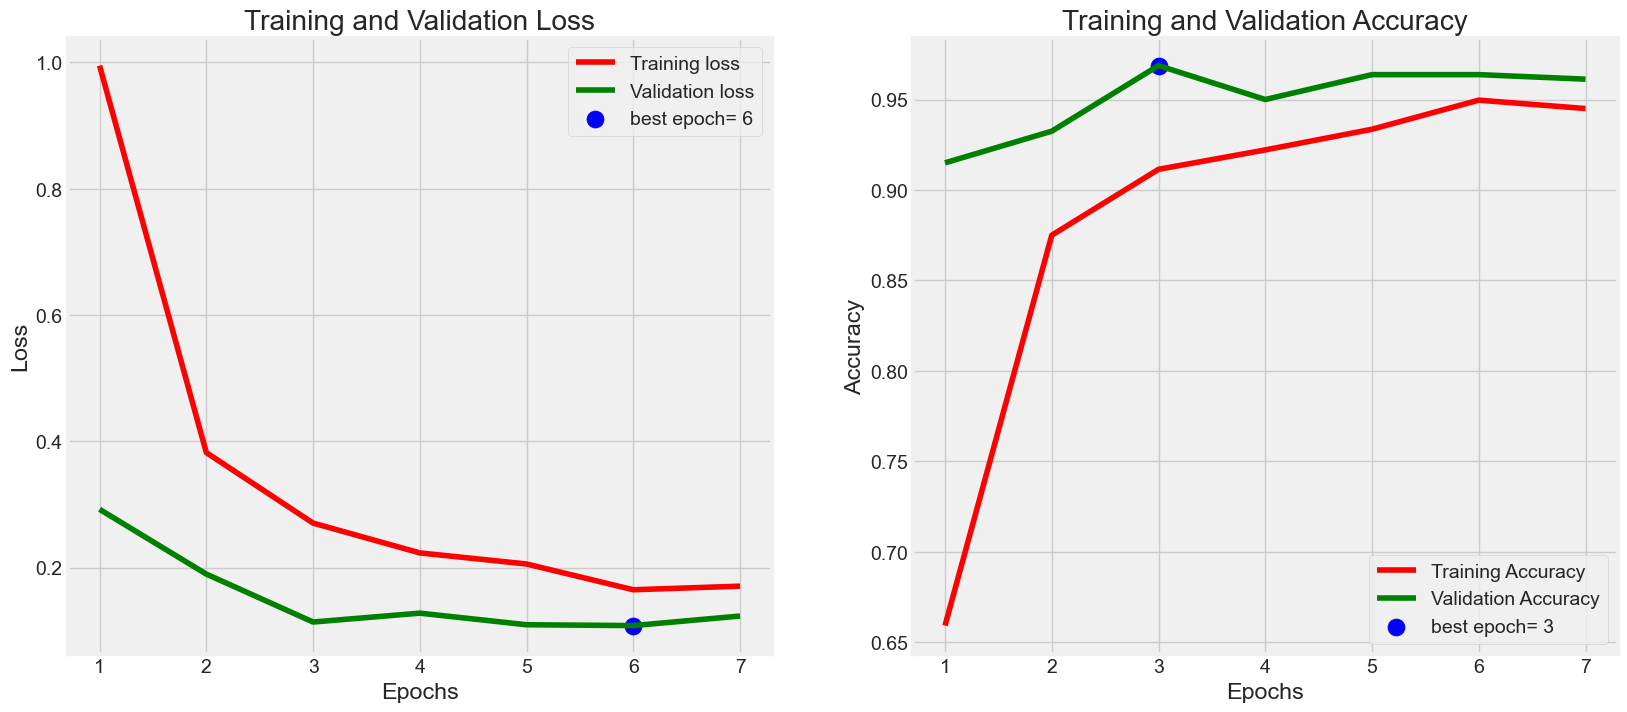

In [6]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plotting training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [7]:
train_loss, train_accuracy = model.evaluate(train_generator)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

# Evaluated the model on validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluated the model on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

88/88 [==============================] - 402s 5s/step - loss: 0.0756 - accuracy: 0.9800
Train Loss: 0.07561265677213669
Train Accuracy: 0.9800000190734863
25/25 [==============================] - 115s 5s/step - loss: 0.1232 - accuracy: 0.9613
Validation Loss: 0.12315818667411804
Validation Accuracy: 0.9612500071525574
13/13 [==============================] - 56s 4s/step - loss: 0.0805 - accuracy: 0.9800
Test Loss: 0.08048608154058456
Test Accuracy: 0.9800000190734863


In [8]:
model.save('xmangomodel.h5')